In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
test_input = False
train_input = True
test_y = False
train_y = True

base_dir = "/dccstor/ipc1/CAR/BFN/Model/Noise/"
noise_range = 4
n_runs = 5

In [3]:
experiment_name = []

if train_input:
    experiment_name.append("tri")
if train_y:
    experiment_name.append("try")
if test_input:
    experiment_name.append("tei")
if test_y:
    experiment_name.append("tey")
    
experiment_name = "_".join(experiment_name)
print(experiment_name)

tri_try


In [4]:
outputs = []
trues = []
for i in range(n_runs):
    true_df = pd.read_csv(os.path.join(base_dir, f"SimData{i+1}", "test_true_df.csv"))
    true_df["repeat"] = i+1
    trues.append(true_df)
    for n in range(noise_range):
        run_output = pd.read_csv(os.path.join(base_dir, f"Error_sd_{n+1}", experiment_name, f"{i+1}_unperturbed.csv"), index_col=1)
        run_output = run_output.rename(columns={"Unnamed: 0": "model"})
        run_output["noise_sd"] = n+1
        run_output["repeat"] = i+1
        
        outputs.append(run_output)

In [5]:
true = pd.concat(trues).reset_index(drop=False)
true

,index,mek12,erk12,mkk4,jnk12,ikk,ikb,ras,map3k7,pi3k,map3k1,akt,p38,hsp27,repeat
0,0,1.911749e-03,1.543352e-14,0.001504,6.434752e-11,0.981182,9.775599e-01,3.380919e-01,0.109724,0.869556,0.682261,0.997706,4.454305e-20,3.457870e-108,1
1,1,2.304207e-46,3.653870e-243,0.842848,9.993324e-01,0.997873,9.792547e-01,9.297571e-08,0.800779,0.995678,0.498383,0.999001,5.930289e-01,4.142918e-01,1
2,2,7.661592e-05,5.573892e-22,0.963191,9.998283e-01,0.998863,9.793503e-01,2.067054e-01,0.871768,0.996698,0.901426,0.999007,7.509802e-01,7.209492e-01,1
3,3,6.954749e-01,4.033256e-01,0.022730,3.953349e-07,0.983467,9.778014e-01,9.983653e-01,0.193613,0.964691,0.910937,0.998787,5.141288e-12,6.957202e-59,1
4,4,2.459303e-12,6.742574e-62,0.972253,9.998691e-01,0.999077,9.793710e-01,1.478759e-02,0.926659,0.993562,0.951949,0.998988,7.776733e-01,7.580045e-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1995,2.079122e-01,5.898486e-01,0.230676,2.786995e-02,0.659382,9.936057e-01,3.670776e-01,0.301973,0.801308,0.981829,0.808504,9.499211e-04,1.064219e-12,5
9996,1996,9.422445e-01,9.952414e-01,0.955722,9.777597e-01,0.910642,9.995234e-01,6.453515e-01,0.878807,0.999999,0.976292,0.907604,4.774275e-01,8.454856e-01,5
9997,1997,8.069358e-06,4.188988e-15,0.020626,1.309333e-06,0.000805,5.096460e-22,8.876741e-02,0.173550,0.336861,0.927115,0.134341,4.917137e-08,1.307204e-32,5
9998,1998,9.905263e-01,9.959609e-01,0.055205,8.224658e-05,0.665360,9.940517e-01,8.318116e-01,0.214579,0.985536,0.954836,0.902840,2.666377e-06,1.462667e-24,5


In [6]:
output = pd.concat(outputs).reset_index(drop=False)
output

,index,model,mek12,erk12,mkk4,jnk12,ikk,ikb,ras,map3k7,pi3k,map3k1,akt,p38,hsp27,noise_sd,repeat
0,0,teacher_true,1.911749e-03,1.543352e-14,1.504402e-03,6.434752e-11,0.981182,0.977560,3.380919e-01,0.109724,0.869556,0.682261,0.997706,4.454305e-20,3.457870e-108,1,1
1,1,teacher_true,2.304207e-46,3.653870e-243,8.428483e-01,9.993324e-01,0.997873,0.979255,9.297571e-08,0.800779,0.995678,0.498383,0.999001,5.930289e-01,4.142918e-01,1,1
2,2,teacher_true,7.661592e-05,5.573892e-22,9.631905e-01,9.998283e-01,0.998863,0.979350,2.067054e-01,0.871768,0.996698,0.901426,0.999007,7.509802e-01,7.209492e-01,1,1
3,3,teacher_true,6.954749e-01,4.033256e-01,2.273002e-02,3.953349e-07,0.983467,0.977801,9.983653e-01,0.193613,0.964691,0.910937,0.998787,5.141288e-12,6.957202e-59,1,1
4,4,teacher_true,2.459303e-12,6.742574e-62,9.722531e-01,9.998691e-01,0.999077,0.979371,1.478759e-02,0.926659,0.993562,0.951949,0.998988,7.776733e-01,7.580045e-01,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1995,untrained_random_input,5.666360e-02,1.560226e-05,3.880313e-11,1.925644e-31,0.964020,0.587699,3.339951e-01,0.997103,0.837062,0.010220,0.697811,1.253677e-40,4.422876e-146,4,5
199996,1996,untrained_random_input,8.756337e-07,2.173637e-24,5.330684e-01,7.811952e-01,0.964762,0.588492,2.316119e-02,1.000000,0.688891,0.999833,0.290918,3.595359e-01,1.708263e-02,4,5
199997,1997,untrained_random_input,1.771980e-01,1.359242e-03,5.119312e-01,7.588201e-01,0.964212,0.587904,4.535521e-01,0.998540,0.613869,0.983700,0.128583,3.239798e-01,1.175986e-02,4,5
199998,1998,untrained_random_input,2.181076e-01,3.062877e-03,2.120965e-10,3.625529e-29,0.964365,0.588068,4.825623e-01,0.999835,0.880097,0.014114,0.782710,9.623882e-38,1.398807e-135,4,5


In [7]:
pred_long = output.melt(id_vars=["index", "noise_sd", "repeat", "model"], var_name="marker", value_name="pred")
true_long = true.melt(id_vars=["index", "repeat"], var_name="marker", value_name="true")
true_long

,index,repeat,marker,true
0,0,1,mek12,1.911749e-03
1,1,1,mek12,2.304207e-46
2,2,1,mek12,7.661592e-05
3,3,1,mek12,6.954749e-01
4,4,1,mek12,2.459303e-12
...,...,...,...,...
129995,1995,5,hsp27,1.064219e-12
129996,1996,5,hsp27,8.454856e-01
129997,1997,5,hsp27,1.307204e-32
129998,1998,5,hsp27,1.462667e-24


In [8]:
df = pred_long.merge(true_long, on=["index", "repeat", "marker"])
df = df.drop("index", axis=1)
df["error"] = (df["true"] - df["pred"])
df["sq_err"] = df["error"]**2
df["abs_error"] = abs(df["error"])
df = df[df["model"]!="teacher_true"]
df

,noise_sd,repeat,model,marker,pred,true,error,sq_err,abs_error
1,1,1,student_same_input,mek12,6.894618e-01,0.001912,-0.687550,0.472725,0.687550
2,1,1,student_random_input,mek12,6.994022e-01,0.001912,-0.697490,0.486493,0.697490
3,1,1,untrained_same_input,mek12,2.258606e-01,0.001912,-0.223949,0.050153,0.223949
4,1,1,untrained_random_input,mek12,9.310409e-01,0.001912,-0.929129,0.863281,0.929129
6,2,1,student_same_input,mek12,9.999963e-01,0.001912,-0.998085,0.996173,0.998085
...,...,...,...,...,...,...,...,...,...
2599994,3,5,untrained_random_input,hsp27,0.000000e+00,0.571506,0.571506,0.326619,0.571506
2599996,4,5,student_same_input,hsp27,9.999999e-01,0.571506,-0.428494,0.183607,0.428494
2599997,4,5,student_random_input,hsp27,9.999999e-01,0.571506,-0.428494,0.183607,0.428494
2599998,4,5,untrained_same_input,hsp27,1.044204e-10,0.571506,0.571506,0.326619,0.571506


In [9]:
avg_error = df.groupby(['noise_sd', "model"]).mean().reset_index(drop=False)
avg_error

,noise_sd,model,repeat,pred,true,error,sq_err,abs_error
0,1,student_random_input,3.0,0.748723,0.5103,-0.238424,0.183122,0.320341
1,1,student_same_input,3.0,0.749210,0.5103,-0.238910,0.157096,0.293320
2,1,untrained_random_input,3.0,0.565436,0.5103,-0.055137,0.288788,0.387630
3,1,untrained_same_input,3.0,0.569303,0.5103,-0.059003,0.161176,0.253697
4,2,student_random_input,3.0,0.963346,0.5103,-0.453046,0.371869,0.459209
5,2,student_same_input,3.0,0.963759,0.5103,-0.453459,0.363958,0.453463
6,2,untrained_random_input,3.0,0.559835,0.5103,-0.049535,0.294462,0.392360
7,2,untrained_same_input,3.0,0.565263,0.5103,-0.054964,0.149073,0.234448
8,3,student_random_input,3.0,0.984312,0.5103,-0.474013,0.416514,0.485263
9,3,student_same_input,3.0,0.984882,0.5103,-0.474583,0.404175,0.474583


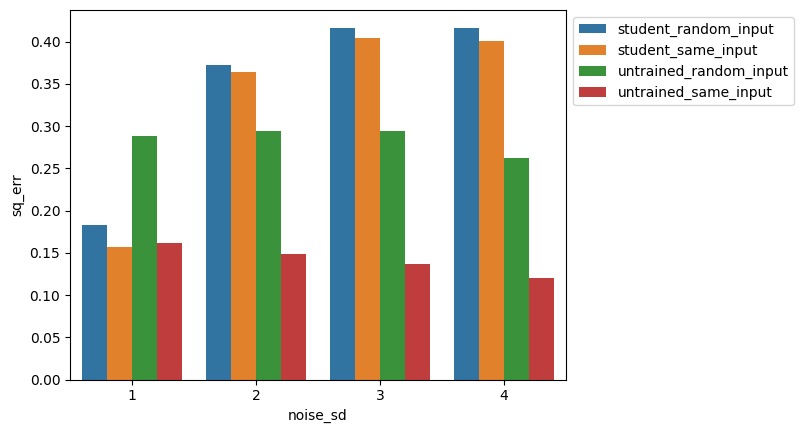

In [10]:
sns.barplot(data=avg_error, x="noise_sd", y="sq_err", hue="model")
plt.legend(bbox_to_anchor=(1,1))

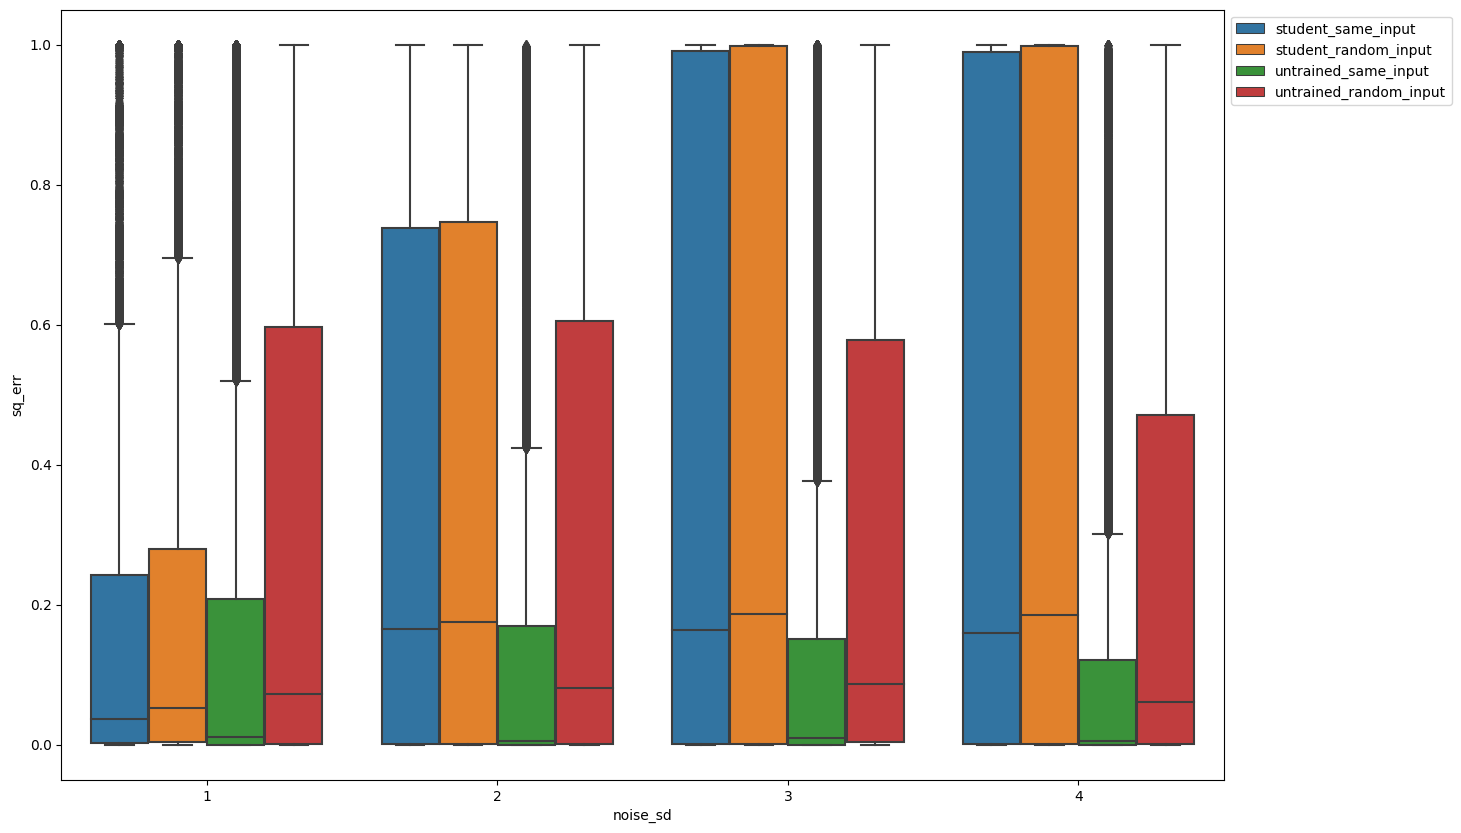

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="noise_sd", y="sq_err", hue="model")
plt.legend(bbox_to_anchor=(1,1))

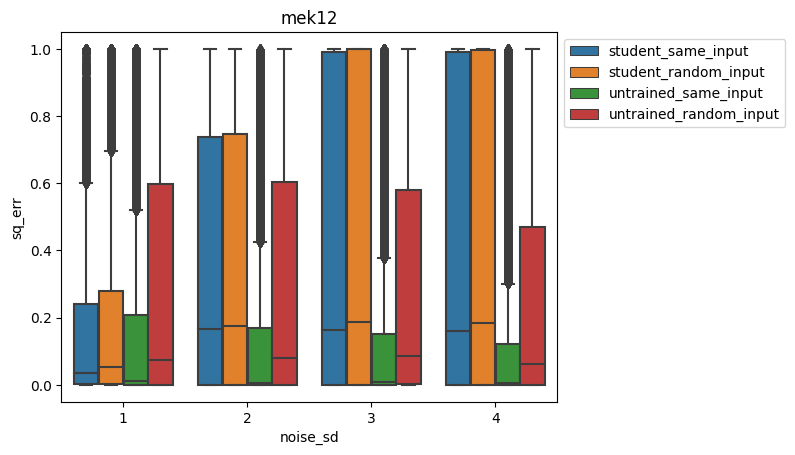

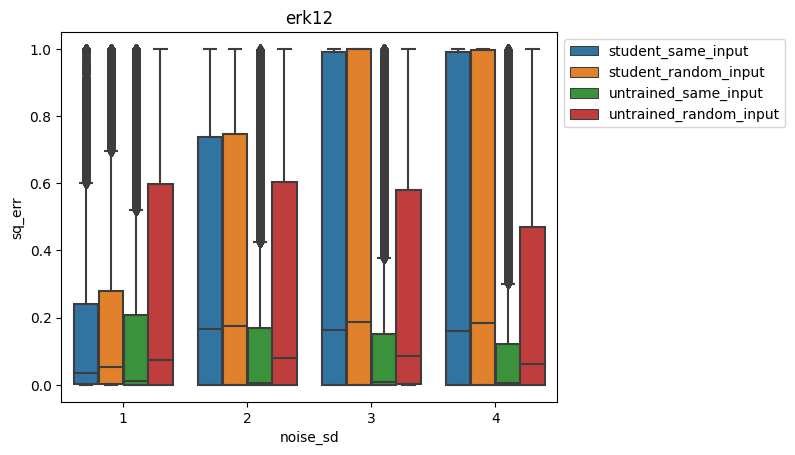

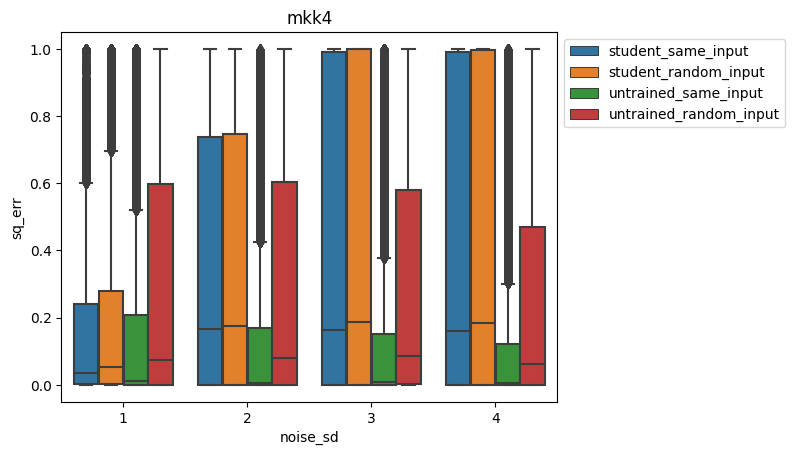

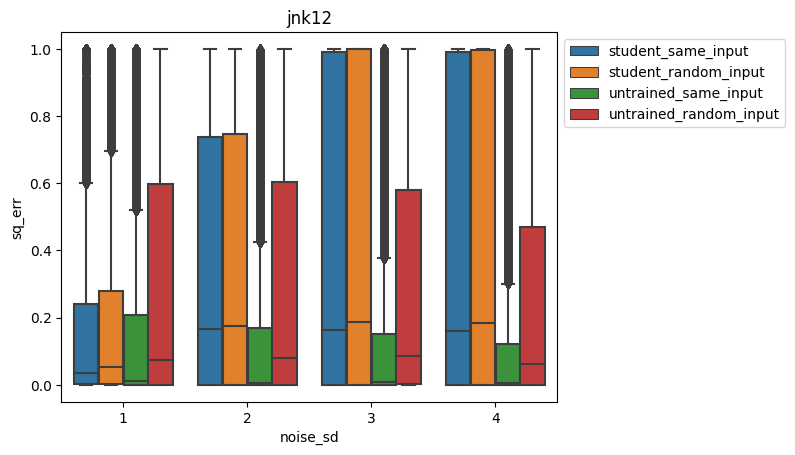

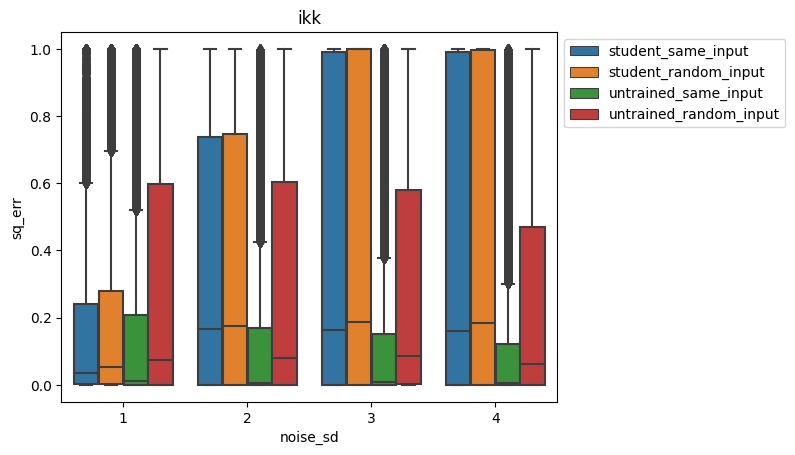

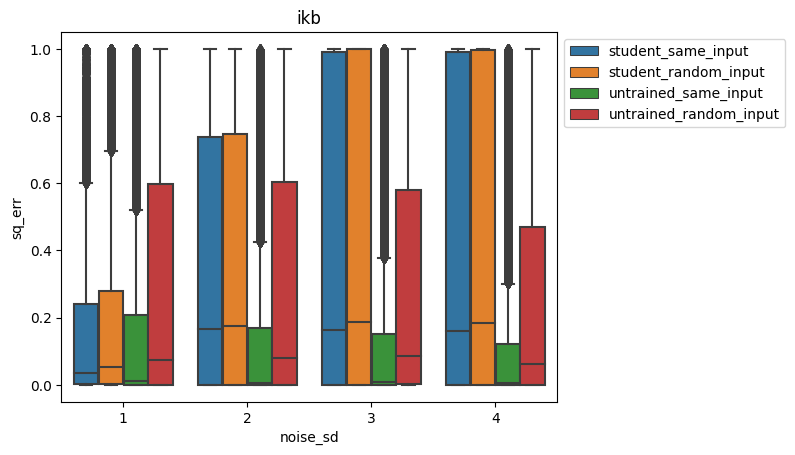

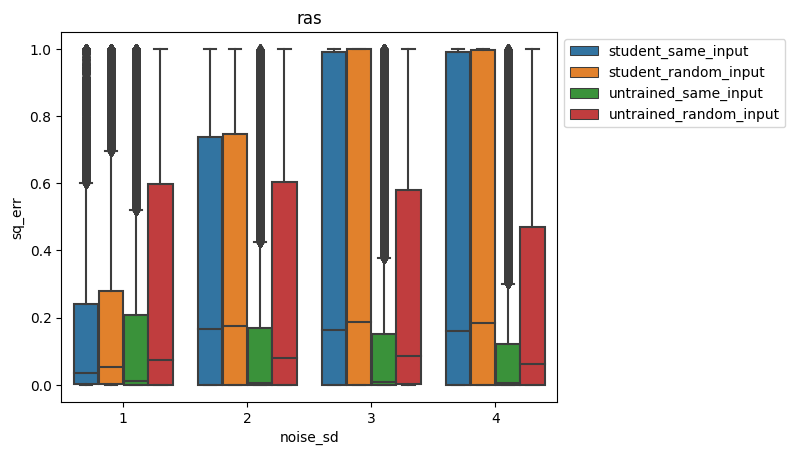

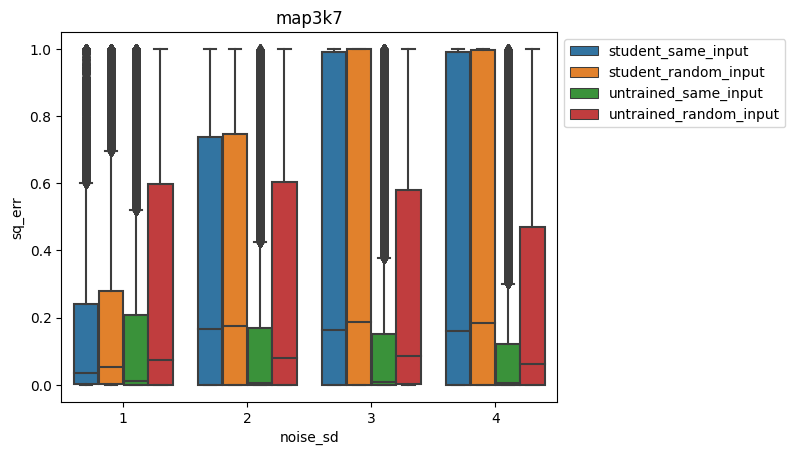

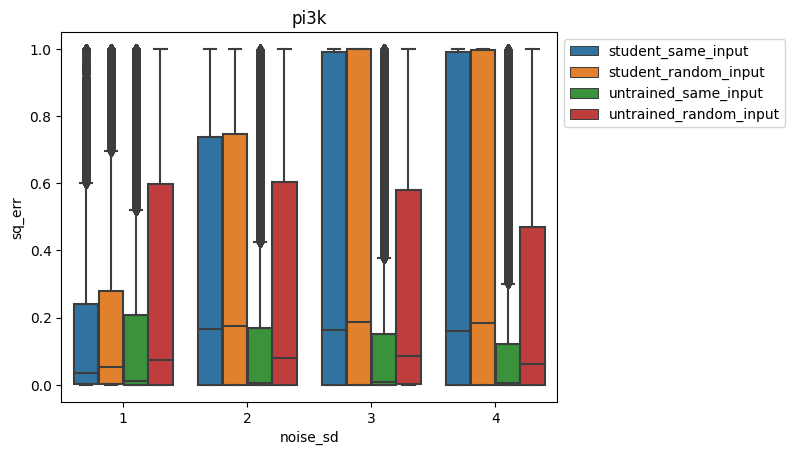

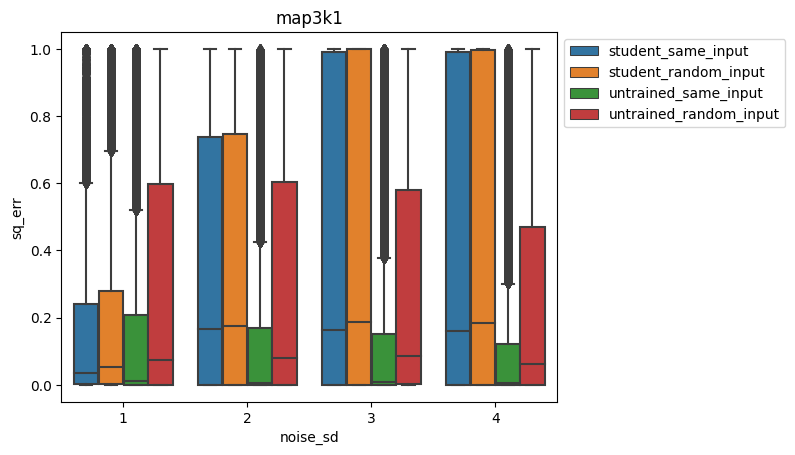

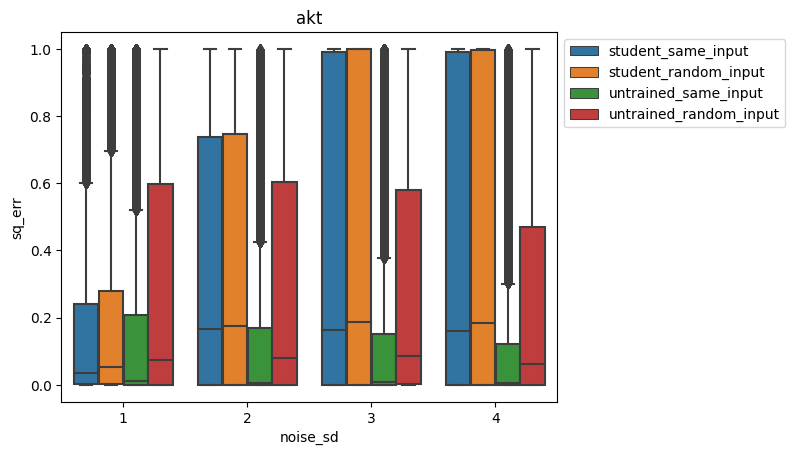

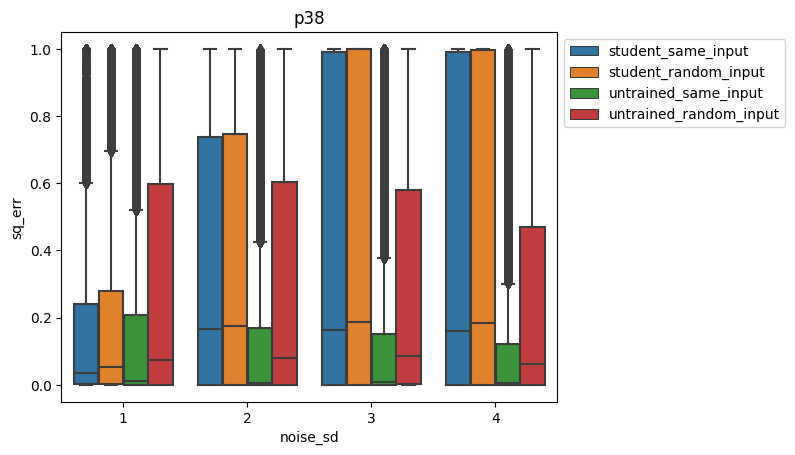

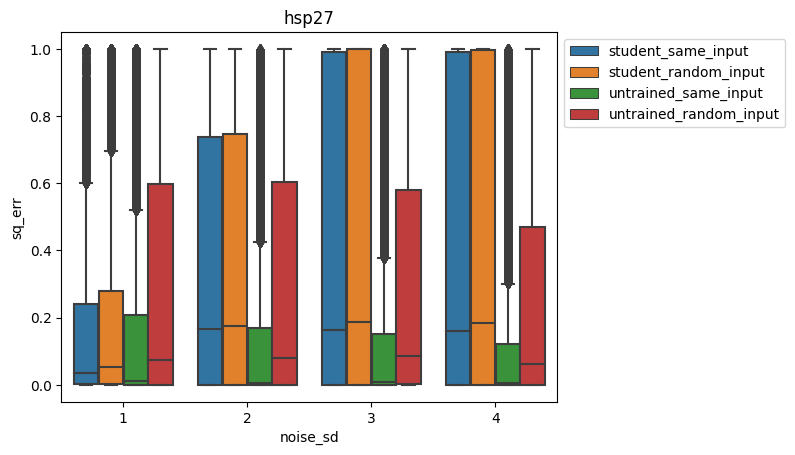

In [12]:
for n in df["marker"].unique():
    sel_df = df[df["marker"]==n]
    sns.boxplot(data=df, x="noise_sd", y="sq_err", hue="model")
    plt.legend(bbox_to_anchor=(1,1))
    plt.title(n)
    plt.show()